# Rain Gauge Quality Comparison - Research Grade Rain Gauges

<b>Maggie Zoerner</b> </br>
SULI Intern</br>
Argonne National Laboratory</br>
Summer 2023</br>

This notebook is a case study for the heavy rainfall that occurred at the ATMOS site on June 25th and 26th, 2023! We will compare the performance of the research grade rain gauges, including: 

* Met One 8in Tipping Bucket Rain Gauge
* Met One Wind Shielded 8in Tipping Bucket Rain Gauge
* Belfort Weighing Bucket Rain Gauge
* NovaLynx 12in Tipping Bucket Rain Gauge
* Optical Scientific (OSi) Optical Rain Gauge (ORG)
* OSi All Precipitation Gauge (APG)
* FD70 Forward Scatter Sensor

These are also compared to the average of the three CoCoRaHS gauges we have on site.

## Import libraries

In [3]:
import numpy as np
import pandas as pd
import xarray as xr 
import os
import matplotlib.pyplot as plt

## Import ORG/APG Data

In [4]:
ORGAPG_files = "C:/Users/maggi/ANL_Internship_2023/ORG_APG/ORGAPG_0625/*.nc"

In [5]:
ORGAPG_ds = xr.open_mfdataset(ORGAPG_files)

### ORG Data

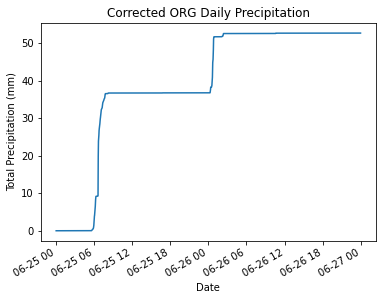

In [6]:
ORG_precip = ORGAPG_ds.ORG_Precip_Accum - ORGAPG_ds.ORG_Precip_Accum[0]
ORG_precip.plot()
plt.title('Corrected ORG Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

### APG Data

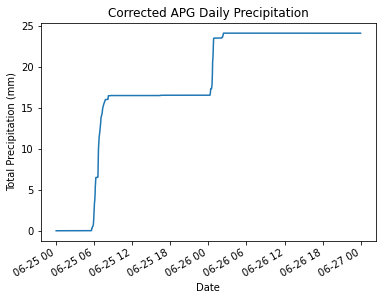

In [7]:
APG_precip = ORGAPG_ds.APG_Precip_Accum - ORGAPG_ds.APG_Precip_Accum[0]
APG_precip.plot()
plt.title('Corrected APG Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

### 12in Tipping Bucket Data

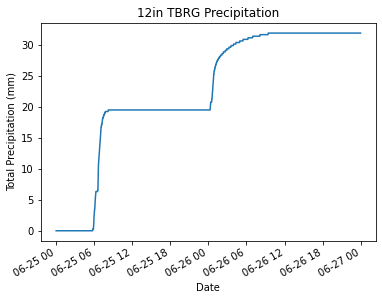

In [8]:
tbrg_12 = np.cumsum(ORGAPG_ds.tb_rain_mm_12in_Tot - ORGAPG_ds.tb_rain_mm_12in_Tot[0])
tbrg_12.plot()
plt.title('12in TBRG Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

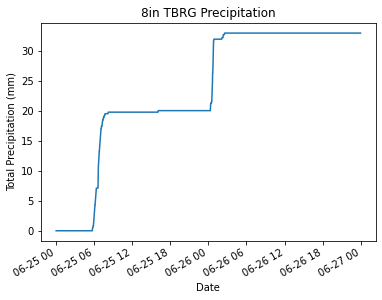

In [9]:
tbrg_8 = np.cumsum(ORGAPG_ds.tb_rain_mm_8in_Tot - ORGAPG_ds.tb_rain_mm_8in_Tot[0])
tbrg_8.plot()
plt.title('8in TBRG Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

In [10]:
tower_files = "C:/Users/maggi/ANL_Internship_2023/Tower_Rain_Gauge/tower_0625/*.nc"

In [11]:
tower_ds = xr.open_mfdataset(tower_files)

In [12]:
tower_ds = xr.open_mfdataset(tower_files)
tower_ds['time'] = pd.to_datetime(tower_ds['time'])
tower_ds['time'] = tower_ds['time'] + pd.Timedelta(hours=1)

## Plot Tower Data

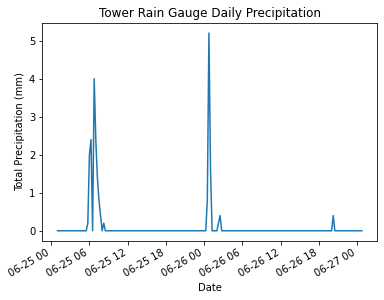

In [13]:
tower_precip = tower_ds.precip
tower_precip.plot()
plt.title('Tower Rain Gauge Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

Text(0, 0.5, 'Total Precipitation (mm)')

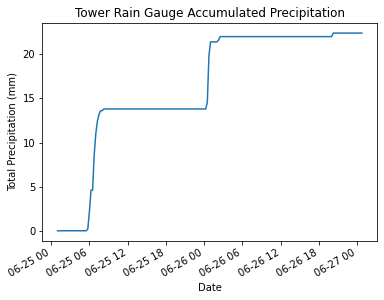

In [14]:
accumulated_tower_precip = np.cumsum(tower_precip)
accumulated_tower_precip.plot()
plt.title('Tower Rain Gauge Accumulated Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')

## Import FD70 Data

In [15]:
FD70_data = "C:/Users/maggi/ANL_Internship_2023/FD70_Rain_Gauge/FD70_0625/*.nc"
FD70_ds = xr.open_mfdataset(FD70_data)

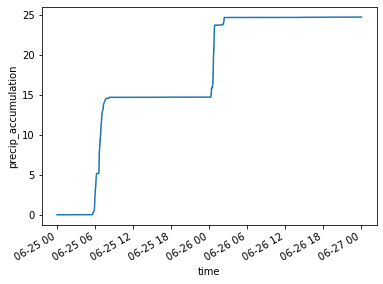

In [16]:
FD70_precip = (FD70_ds.precip_accumulation-FD70_ds.precip_accumulation[0])
FD70_precip.plot()

## Add Belfort Weighing Bucket Data

In [17]:
belfort_precip = 28.575

## Add CoCoRaHS Standard Gauge Data

In [18]:
cocorahs = 29.768

## Add Error Measurements for Each Rain Gauge

In [19]:
error_fd70 = 2.2
error_novalynx = 1.0
error_metone_8 = 0.5 #use 1.0 for heavy rain (25.4-76.2 mm/hr), and 0.5 for light (<12.7 mm/hr)
error_metone_tower =  1.0 
error_wbrg = 0.5
error_metone_12 = 0.5 #use 2.0 for heavy rain (< 76.2 mm/hr), and 0.5 for light (<12.7 mm/hr)
error_org = 5.0
error_apg = 5.0
error_crh = 4.0

## Plot All Rain Gauges Together

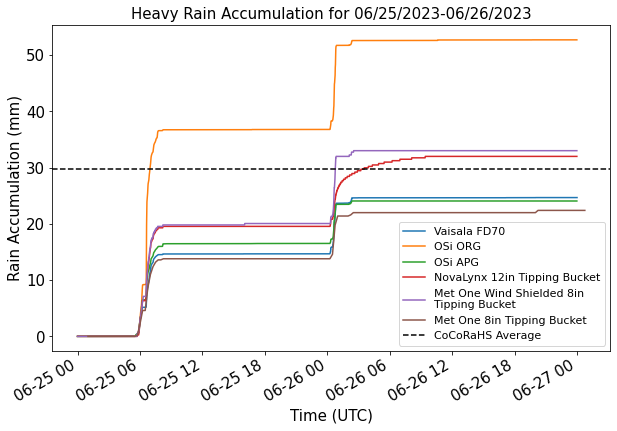

In [20]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))

FD70_precip.plot(ax=ax1, label='Vaisala FD70')
ORG_precip.plot(ax=ax1, label='OSi ORG')
APG_precip.plot(ax=ax1, label='OSi APG')
tbrg_12.plot(ax=ax1, label='NovaLynx 12in Tipping Bucket')
tbrg_8.plot(ax=ax1, label='Met One Wind Shielded 8in \nTipping Bucket')
accumulated_tower_precip.plot(ax=ax1, label='Met One 8in Tipping Bucket')

plt.axhline(cocorahs, color='black', linestyle='--', label='CoCoRaHS Average')

ax1.set_title('Heavy Rain Accumulation for 06/25/2023-06/26/2023', fontsize=15)
ax1.set_xlabel('Time (UTC)', fontsize=15)
ax1.set_ylabel('Rain Accumulation (mm)', fontsize=15)
ax1.legend(fontsize=11, loc = 'lower right')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [21]:
#rain_gauge_labels = ['ORG','Wind Shielded 8in Tipping Bucket','12in Tipping Bucket', 'Belfort Weighing Bucket', 'FD70', 'APG','Tower 8in Rain Gauge','CoCoRaHS Gauge']
#rainfall_amounts = [ORG_precip.max(),tbrg_8.max(), tbrg_12.max(), belfort_precip, FD70_precip.max(), APG_precip.max(),  accumulated_tower_precip.max(), cocorahs]

#plt.figure(figsize=(45,20))
#plt.bar(rain_gauge_labels, rainfall_amounts)
#plt.xlabel('Rain Gauges', fontsize=30)
#plt.ylabel('Rainfall Amount (mm)', fontsize=30)
#plt.title('Event Rain Accumulation', fontsize=30)
#plt.xticks(fontsize=30)
#plt.yticks(fontsize=30)
#plt.show()

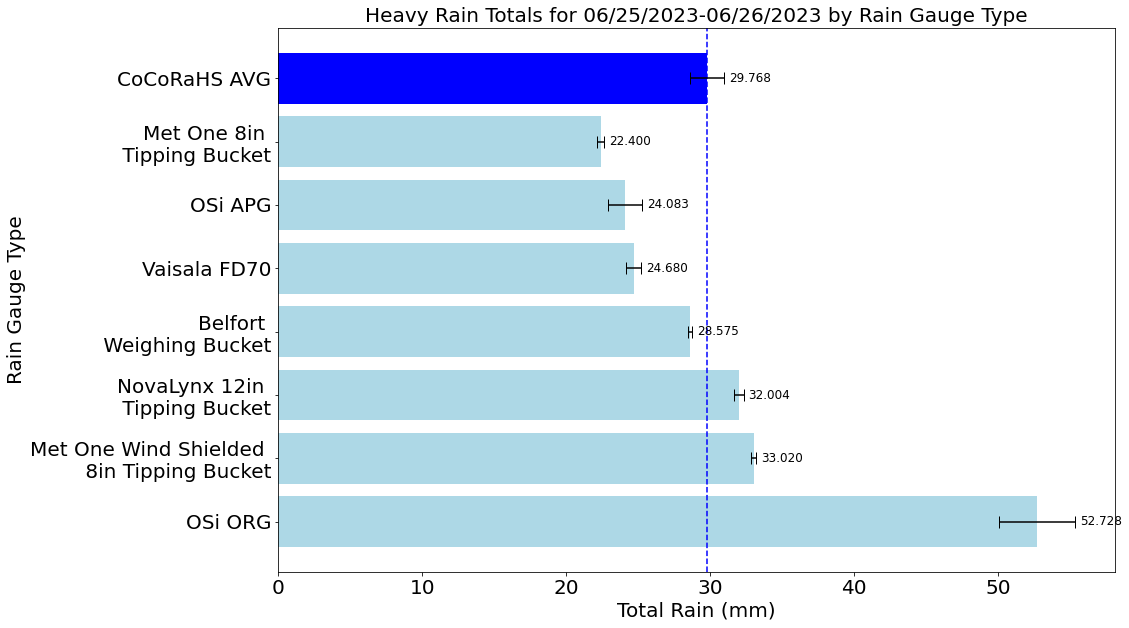

In [22]:
rain_gauge_labels = ['OSi ORG','Met One Wind Shielded \n 8in Tipping Bucket','NovaLynx 12in \n Tipping Bucket', 'Belfort \n Weighing Bucket', 'Vaisala FD70', 'OSi APG','Met One 8in \n Tipping Bucket']
rainfall_amounts = [ORG_precip.max(),tbrg_8.max(), tbrg_12.max(), belfort_precip, FD70_precip.max(), APG_precip.max(),  accumulated_tower_precip.max()]

fig = plt.figure(figsize = (15,10))
ax=fig.add_subplot(111)
all_rg_bar=plt.barh(rain_gauge_labels, rainfall_amounts, color ='lightblue')


# Adding and plotting the CoCoRaHS data
crh_bar=ax.barh(['CoCoRaHS AVG'], [cocorahs], color='b')

# Add a line to be able to more clearly visualize the "true" value of the total event rainfall
plt.axvline(x = cocorahs, color = 'b', linestyle='--')

# Add error percentages 
error_percentages = [error_org, error_metone_8, error_novalynx, error_wbrg, error_fd70, error_apg, error_metone_tower]

error_bars = np.array(rainfall_amounts)*np.array(error_percentages)/100

error_bars_crh = cocorahs*error_crh/100

all_rg_bar = ax.barh(rain_gauge_labels, rainfall_amounts, xerr = error_bars, color='lightblue',capsize=6)
ax.bar_label(all_rg_bar, fmt ='%.3f', padding = 5, fontsize = 12)

crh_bar = ax.barh(['CoCoRaHS AVG'], cocorahs, xerr=error_bars_crh, color='b', capsize=6)
ax.bar_label(crh_bar, fmt = '%.3f', padding = 5, fontsize = 12)

# Plot the graph
plt.ylabel("Rain Gauge Type", fontsize=20)
plt.xlabel("Total Rain (mm)", fontsize=20)
plt.title("Heavy Rain Totals for 06/25/2023-06/26/2023 by Rain Gauge Type", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [23]:
start_time = '2023-06-25 T05:25:00'
end_time = '2023-06-25 T05:35:00'

In [24]:
FD70_onset = FD70_precip.sel(time=slice(start_time, end_time))
#metone12_precip_onset = metone12_precip.sel(time=slice(start_time, end_time))
tower_precip_onset = accumulated_tower_precip.sel(time=slice(start_time, end_time))
ORG_precip_onset = ORG_precip.sel(time=slice(start_time, end_time))
APG_precip_onset = APG_precip.sel(time=slice(start_time, end_time))
novalynx_precip_onset = tbrg_12.sel(time=slice(start_time, end_time))
windshld_8in_onset = tbrg_8.sel(time=slice(start_time, end_time))

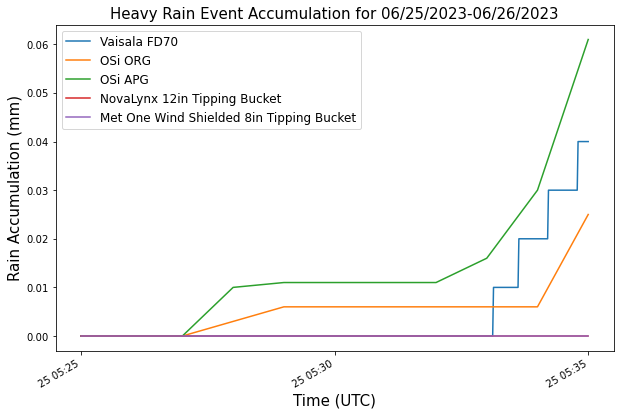

In [26]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))

FD70_onset.plot(ax=ax1, label='Vaisala FD70')
ORG_precip_onset.plot(ax=ax1, label='OSi ORG')
APG_precip_onset.plot(ax=ax1, label='OSi APG')
novalynx_precip_onset.plot(ax=ax1, label='NovaLynx 12in Tipping Bucket')
windshld_8in_onset.plot(ax=ax1, label='Met One Wind Shielded 8in Tipping Bucket')
#tower_precip_onset.plot(ax=ax1, label='Met One 8in Tipping Bucket')
#metone12_precip_onset.plot(ax=ax1, label='Met One 12in Tipping Bucket')

ax1.set_title('Heavy Rain Event Accumulation for 06/25/2023-06/26/2023',fontsize=15)
ax1.set_xlabel('Time (UTC)',fontsize=15)
ax1.set_ylabel('Rain Accumulation (mm)',fontsize=15)
ax1.legend(fontsize=12)
# Show the two plots
plt.show()